# Part 1: Strategy Simulation #

## Importing the data and required libraries ##

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import DBSCAN
from sklearn.ensemble import IsolationForest

In [2]:
raw_df = pd.read_csv('/Users/jeremyobadia/Desktop/MFin/MIT Fall Term/Financial Data Science/Data/project_b_data.csv',header=None)

In [3]:
raw_df= raw_df.rename(columns={0: "Date", 1: "ID", 2:"Return"})
raw_df.head()

,Date,ID,Return
0,01/02/1990,10137,0.002981
1,01/02/1990,10225,0.019181
2,01/02/1990,10401,0.021740
3,01/02/1990,10488,0.000000
4,01/02/1990,10516,-0.005420


## Annualizing the returns ##

In [4]:
raw_df['Return'] = raw_df['Return']*252
dates = raw_df['Date'].unique()
securities = raw_df['ID'].unique()

In [5]:
raw_df.head()

,Date,ID,Return
0,01/02/1990,10137,0.751100
1,01/02/1990,10225,4.833578
2,01/02/1990,10401,5.478471
3,01/02/1990,10488,0.000000
4,01/02/1990,10516,-1.365754


## Formatting the data ##

In [7]:
clean_df = pd.DataFrame(index=raw_df['Date'].unique(), columns = raw_df['ID'].unique())
for ID in securities:
    clean_df[ID]=raw_df.loc[raw_df['ID'] == ID].reset_index(drop=True)['Return'].values


In [96]:
clean_df.head()

,10137,10225,10401,10488,10516,10656,10866,10890,11308,11404,...,81294,81614,81700,81702,82107,83030,83396,83433,83601,84129
01/02/1990,0.751100,4.833578,5.478471,0.000000,-1.365754,4.235356,5.740450,14.522528,2.434867,1.079270,...,1.916462,3.210356,-8.263019,7.252279,-1.358407,3.315829,0.000000,8.129765,-1.373355,2.260103
01/03/1990,-0.751070,0.000000,-2.040620,-47.177398,0.000000,-12.925910,11.103107,-6.121759,-3.661062,-4.344931,...,0.000000,3.169796,0.000000,1.780876,0.000000,3.272799,11.201954,-8.129729,2.739167,4.460258
01/04/1990,-0.753345,-5.722644,-4.131198,53.249868,-1.373355,12.926011,-4.382622,2.057224,-1.232264,-4.421088,...,3.262352,-5.091082,4.165467,5.268544,2.709751,3.230757,-3.678960,0.000000,0.000000,0.000000
01/05/1990,-2.273690,-1.339152,-4.200116,-12.295109,-11.264485,-12.925910,-1.107703,6.072523,-2.067296,-2.240127,...,0.000000,-6.545816,0.000000,-1.744065,0.000000,-3.230851,-3.733432,0.000000,0.000000,4.382754
01/08/1990,-3.063972,-5.887167,6.274162,24.018165,2.863774,12.926011,2.210647,-8.129729,5.340101,-4.540627,...,-1.916421,0.000000,-12.708488,-1.755992,0.000000,0.000000,1.873693,-4.165271,0.000000,-4.382622


## Computing Index Value ##

In [9]:
index = pd.DataFrame(index = dates, columns = ['Index'])
index['Index']=clean_df.sum(axis = 1)/690
index.head()

,Index
01/02/1990,2.811066
01/03/1990,0.366954
01/04/1990,-0.839873
01/05/1990,-0.994850
01/08/1990,0.278040


In [10]:
index['Dates']=dates

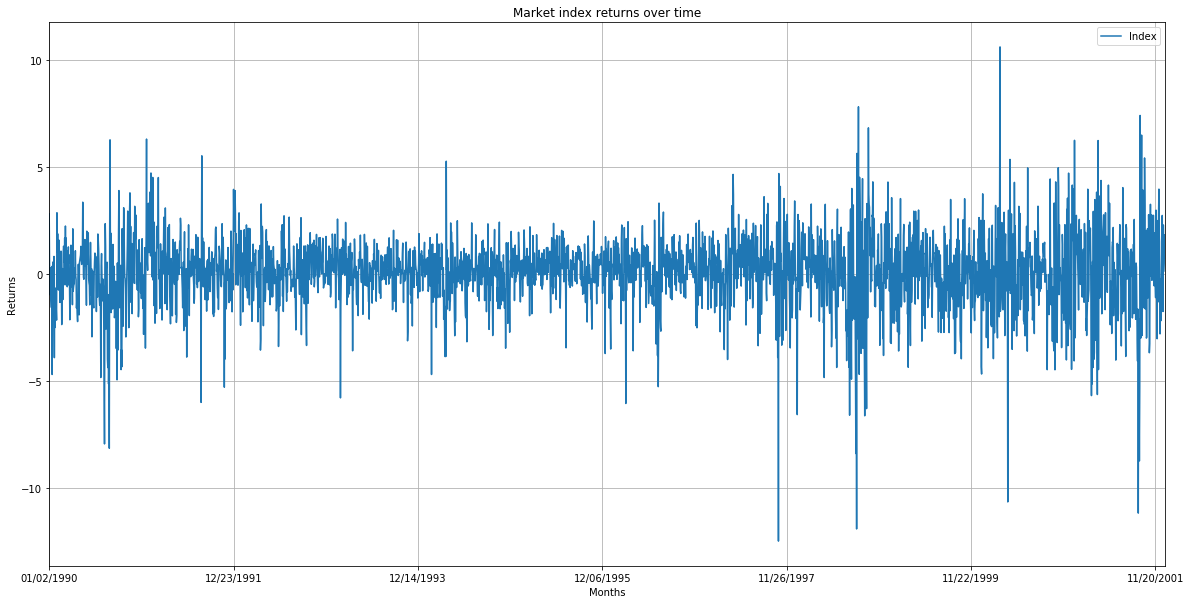

In [11]:
index.plot(x = 'Dates',y = 'Index', figsize = (20,10), grid =True)
plt.title('Market index returns over time')
plt.xlabel('Months')
plt.ylabel('Returns')
plt.show()

## Computing Signal Values ##

In [12]:
signal_df = pd.DataFrame(index=dates, columns = securities)
for ID in securities:
    signal_df[ID]= - (clean_df[ID]-index['Index'])
signal_df.head()

,10137,10225,10401,10488,10516,10656,10866,10890,11308,11404,...,81294,81614,81700,81702,82107,83030,83396,83433,83601,84129
01/02/1990,2.059966,-2.022512,-2.667405,2.811066,4.176820,-1.424290,-2.929384,-11.711463,0.376199,1.731796,...,0.894604,-0.399290,11.074084,-4.441214,4.169473,-0.504763,2.811066,-5.318699,4.184421,0.550963
01/03/1990,1.118024,0.366954,2.407574,47.544351,0.366954,13.292864,-10.736153,6.488712,4.028015,4.711885,...,0.366954,-2.802843,0.366954,-1.413923,0.366954,-2.905846,-10.835000,8.496683,-2.372213,-4.093304
01/04/1990,-0.086528,4.882771,3.291325,-54.089741,0.533483,-13.765884,3.542749,-2.897097,0.392391,3.581215,...,-4.102225,4.251209,-5.005340,-6.108417,-3.549624,-4.070630,2.839087,-0.839873,-0.839873,-0.839873
01/05/1990,1.278840,0.344302,3.205266,11.300258,10.269635,11.931060,0.112853,-7.067373,1.072446,1.245277,...,-0.994850,5.550966,-0.994850,0.749215,-0.994850,2.236001,2.738581,-0.994850,-0.994850,-5.377604
01/08/1990,3.342012,6.165207,-5.996122,-23.740125,-2.585734,-12.647971,-1.932607,8.407769,-5.062061,4.818667,...,2.194461,0.278040,12.986529,2.034032,0.278040,0.278040,-1.595653,4.443311,0.278040,4.660662


## Finding signals to short and buy at each day ##

In [14]:
signal_df_T = signal_df.T
signal_df_T.head()

,01/02/1990,01/03/1990,01/04/1990,01/05/1990,01/08/1990,01/09/1990,01/10/1990,01/11/1990,01/12/1990,01/15/1990,...,12/17/2001,12/18/2001,12/19/2001,12/20/2001,12/21/2001,12/24/2001,12/26/2001,12/27/2001,12/28/2001,12/31/2001
10137,2.059966,1.118024,-0.086528,1.278840,3.342012,-2.006397,-2.340138,-0.415896,-2.404045,3.159327,...,11.686976,-2.219617,-8.655285,-0.175703,1.855964,-3.133109,-1.401003,-2.076949,5.298307,-3.510877
10225,-2.022512,0.366954,4.882771,0.344302,6.165207,5.731300,2.702245,-0.607265,-0.373086,-3.263157,...,3.034602,0.250303,-1.902353,-2.386902,3.168028,2.497193,-0.584980,1.768106,-0.091606,3.484382
10401,-2.667405,2.407574,3.291325,3.205266,-5.996122,1.532312,-0.176799,3.873583,1.765629,1.374405,...,-11.585377,8.272234,-2.079987,-17.036601,-4.672938,0.729528,2.307924,5.202122,-2.453543,0.688290
10488,2.811066,47.544351,-54.089741,11.300258,-23.740125,-1.236957,-1.572959,0.349022,-4.705454,-2.293816,...,2.350423,-6.144151,-2.710815,-13.002606,3.206722,0.729528,-2.721584,0.384996,-21.437576,-27.242427
10516,4.176820,0.366954,0.533483,10.269635,-2.585734,-1.236957,2.734799,-2.530946,1.087834,-3.754701,...,2.459737,4.271688,3.632111,-1.411448,6.146798,-4.690004,3.888393,-2.850151,6.383607,-0.218268


## Computing portfolio ##

In [16]:
long = ['Long']*69
short = ['Short']*69
no_weight = ['0']*552
index_sl=no_weight+long+short


#### Takes some time to run ####

In [17]:
invest_df = pd.DataFrame(index= index_sl, columns = dates)
for day in dates:
    l_id = list(signal_df_T.nlargest(69, day)[day].index)
    s_id = list(signal_df_T.nsmallest(69, day)[day].index)
    j = signal_df_T.drop(l_id)
    j = j.drop(s_id)[day]
    z_id = list(j.index)
    invest_df[day]=z_id+l_id + s_id
invest_df

,01/02/1990,01/03/1990,01/04/1990,01/05/1990,01/08/1990,01/09/1990,01/10/1990,01/11/1990,01/12/1990,01/15/1990,...,12/17/2001,12/18/2001,12/19/2001,12/20/2001,12/21/2001,12/24/2001,12/26/2001,12/27/2001,12/28/2001,12/31/2001
0,10137,10137,10137,10137,10137,10137,10137,10137,10137,10137,...,10225,10137,10225,10137,10137,10137,10137,10137,10137,10137
0,10225,10225,10225,10225,10516,10225,10225,10225,10225,10225,...,10488,10225,10401,10225,10225,10225,10225,10225,10225,10225
0,10401,10401,10401,10401,10866,10401,10401,10401,10401,10401,...,10516,10488,10488,10516,10401,10401,10401,10488,10401,10401
0,10488,10516,10516,10866,11308,10488,10488,10488,10516,10488,...,10866,10516,10516,10890,10488,10488,10488,10516,10656,10516
0,10516,11308,10866,11308,11404,10516,10516,10516,10656,10516,...,11308,10866,10866,11308,10516,10516,10516,10656,10890,10656
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Short,23915,18681,44951,37875,53866,27705,37568,27713,20053,64020,...,47888,60628,35991,64282,54675,38295,60628,15203,50788,24256
Short,48485,48389,24441,40440,61313,27764,47466,20694,21776,14702,...,45241,12060,44150,66078,73139,26382,40061,35124,36468,19596
Short,42550,19895,32651,27254,51086,38333,64020,61209,22753,38333,...,30940,12650,55511,29946,11691,42550,14219,74908,58675,38172
Short,48725,58819,62907,46149,63715,50497,17137,37875,24248,55467,...,17750,50606,49373,28840,63781,76946,64282,17961,39765,26112


In [18]:
strat_df = pd.DataFrame(index = dates, columns = ['Returns'])
strat_df['Returns']['01/02/1990']=0

for i in range(1, len(dates)):
    l=list(signal_df_T.nlargest(69, dates[i-1])[dates[i-1]].index)
    s=list(signal_df_T.nsmallest(69, dates[i-1])[dates[i-1]].index)

    
    strat_df['Returns'][dates[i]]=(clean_df[l][i:i+1].sum(axis = 1))/69 +(clean_df[s][i:i+1].sum(axis = 1))/(-69)

In [125]:
strat_df['Returns']=strat_df['Returns'].astype(float)
strat_df

,Returns,Dates
01/02/1990,0.000000,01/02/1990
01/03/1990,3.104149,01/03/1990
01/04/1990,2.268932,01/04/1990
01/05/1990,-0.471001,01/05/1990
01/08/1990,6.073575,01/08/1990
...,...,...
12/24/2001,5.791993,12/24/2001
12/26/2001,1.467490,12/26/2001
12/27/2001,3.242864,12/27/2001
12/28/2001,5.163158,12/28/2001


#### Long and short sub-portfolios returns ####

In [19]:
long_portf = pd.DataFrame(index = dates, columns = ['Returns'])
long_portf['Returns']['01/02/1990']=0


short_portf = pd.DataFrame(index = dates, columns = ['Returns'])
short_portf['Returns']['01/02/1990']=0

for i in range(1, len(dates)):
    l=list(signal_df_T.nlargest(69, dates[i-1])[dates[i-1]].index)
    
    long_portf['Returns'][dates[i]]=(clean_df[l][i:i+1].sum(axis = 1))/69
for i in range(1, len(dates)):
    
    s=list(signal_df_T.nsmallest(69, dates[i-1])[dates[i-1]].index)
    short_portf['Returns'][dates[i]]=(clean_df[s][i:i+1].sum(axis = 1))/(-69)

In [20]:
short_portf['Returns'] = short_portf['Returns'].astype(float)
long_portf['Returns'] = long_portf['Returns'].astype(float)
long_portf
short_portf

,Returns
01/02/1990,0.000000
01/03/1990,0.513037
01/04/1990,1.037701
01/05/1990,0.062897
01/08/1990,2.725237
...,...
12/24/2001,0.968314
12/26/2001,1.291082
12/27/2001,-1.071887
12/28/2001,2.065471


## Portfolio Analytics ##

#### Mean ####

In [21]:
strat_df['Returns']=strat_df['Returns'].astype(float)
strat_mean = np.mean(strat_df['Returns'])
print('The annualized average return of the strategy is:',np.round(strat_mean,decimals=2), 'or',np.round(np.mean(strat_df['Returns']),decimals=2)*100,'%.')



The annualized average return of the strategy is: 3.33 or 333.0 %.


#### Standard deviation ####

In [22]:
strat_std = np.std(strat_df['Returns'])/np.sqrt(252)

print('The annualized standard deviation of returns of the strategy is:',np.round(strat_std,decimals=2),'or',np.round(np.std(strat_df['Returns']/np.sqrt(252)),decimals=2)*100,'%.')



The annualized standard deviation of returns of the strategy is: 0.16 or 16.0 %.


#### Sharpe ratio ####

In [23]:
strat_SR = np.round((np.mean(strat_df['Returns']))/np.std(strat_df['Returns']/np.sqrt(252)),decimals=2)
print('The annualized Sharpe ratio of this strategy is:',np.round((np.mean(strat_df['Returns']))/np.std(strat_df['Returns']/np.sqrt(252)),decimals=2),'.')



The annualized Sharpe ratio of this strategy is: 20.36 .


#### Market Index Analytics ####

In [24]:
mkt_mean = np.mean(index['Index'])
mkt_std = np.std(index['Index'])/np.sqrt(252)
mkt_SR = mkt_mean/mkt_std

In [26]:
metrics = ['Mean of annualized returns', 'Standard deviation', 'Sharpe ratio']


In [27]:
summary=pd.DataFrame(index = metrics, columns = ['Market Index', 'Contrarian Strategy'])
summary['Contrarian Strategy']=np.round([strat_mean, strat_std, strat_SR], decimals=2)
summary['Market Index']= np.round([mkt_mean,mkt_std, mkt_SR], decimals=2)
summary

,Market Index,Contrarian Strategy
Mean of annualized returns,0.08,3.33
Standard deviation,0.11,0.16
Sharpe ratio,0.77,20.36


#### Plot of portfolio returns over time ####

In [28]:
strat_df['Dates']=dates

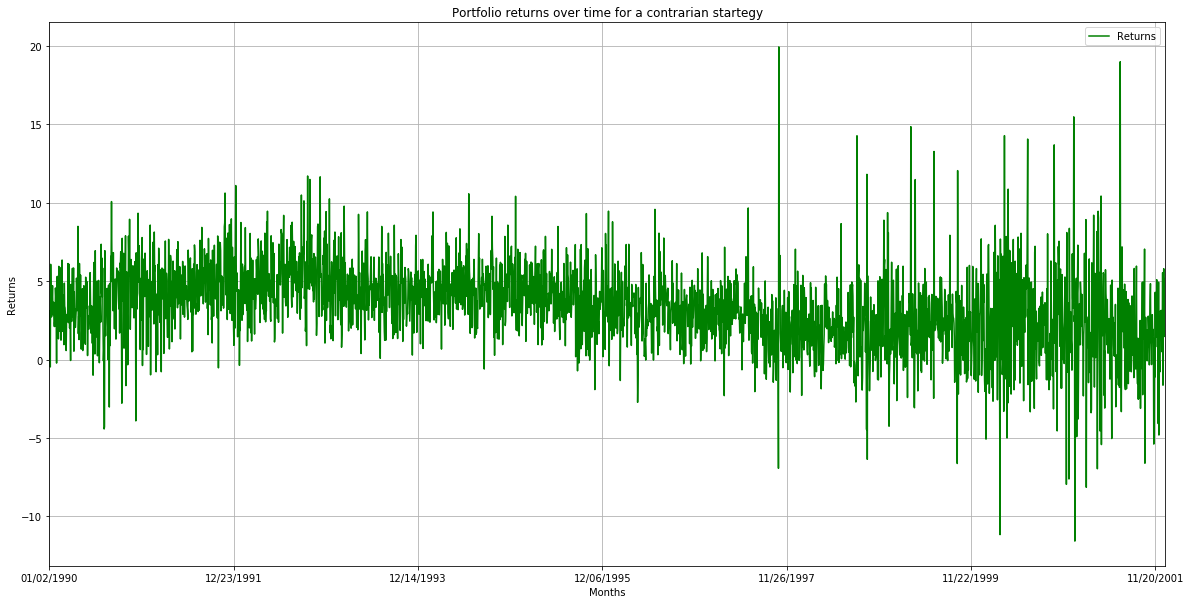

In [29]:
strat_df.plot(x = 'Dates',y = 'Returns', figsize = (20,10), grid =True, c='green')
plt.title('Portfolio returns over time for a contrarian startegy')
plt.xlabel('Months')
plt.ylabel('Returns')
plt.show()

#### Correlation between Market Index and Portfolio returns ####

In [30]:
print('The correlation between the market index and the portfolio returns is:',np.round(np.corrcoef(strat_df['Returns'],index['Index'])[0][1], decimals=2),'.')

The correlation between the market index and the portfolio returns is: 0.12 .


#### Correlation between long and short sub-portfolios ####

In [31]:
corr_ls = np.round(np.corrcoef(long_portf['Returns'], short_portf['Returns'])[0][1], decimals=2)
corr_ls
print('The correlation between the long and short sub-portfolios is:', corr_ls)

The correlation between the long and short sub-portfolios is: -0.47


## Analyzing stationarity ##

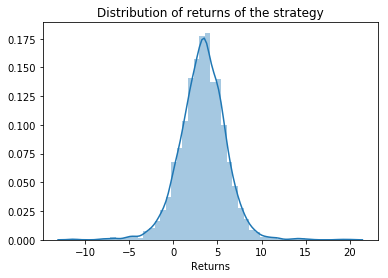

In [34]:
sns.distplot(strat_df['Returns'])
plt.title('Distribution of returns of the strategy')
plt.show()

In [35]:
print('Skewness of distribution of strategy returns is:', np.round(strat_df['Returns'].skew(),decimals=2))
print('Kurtosis of distribution of strategy returns is:',np.round(strat_df['Returns'].kurt(),decimals=2))

Skewness of distribution of strategy returns is: -0.05
Kurtosis of distribution of strategy returns is: 2.83


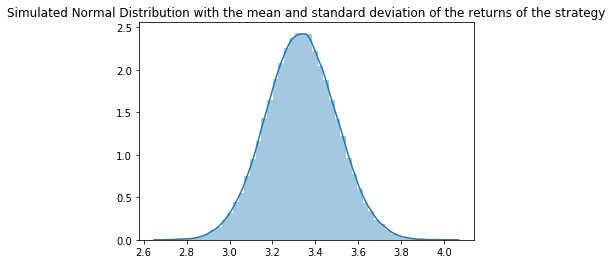

In [36]:
sim_ret = np.random.normal(strat_mean, strat_std, 100000)
sns.distplot(sim_ret)
plt.title('Simulated Normal Distribution with the mean and standard deviation of the returns of the strategy')
plt.show()

## Analyzing outliers ##

#### Unusual market days in the raw data ####

In [37]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2089320 entries, 0 to 2089319
Data columns (total 3 columns):
Date      object
ID        int64
Return    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 47.8+ MB


In [38]:
raw_df['Return'].describe()

count    2.089320e+06
mean     8.131060e-02
std      7.134083e+00
min     -2.573378e+02
25%     -2.731818e+00
50%      0.000000e+00
75%      2.784531e+00
max      3.868831e+02
Name: Return, dtype: float64

In [39]:
out_days = []
for i in range(0, len(index['Index'])):
    if np.abs(index['Index'][i]) > 10:
        out_days.append(index.index[i])
out_days

['10/27/1997', '08/31/1998', '03/16/2000', '04/14/2000', '09/17/2001']

#### Outlier securities ####

In [93]:
securities[1]

10225

In [94]:
np.mean(clean_df[10225])

0.08611503373543224

In [103]:
out_sec = []
for ID in securities:
    if np.mean(clean_df[ID])==0:
        out_sec.append(ID)
    if np.std(clean_df[ID])/np.sqrt(252)==0:
        out_sec.append(ID)
    if abs(np.mean(clean_df[ID]))>0.3:
        out_sec.append(ID)
out_sec

[12650, 14702]

#### Outliers in the portfolio returns ###

/Applications/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


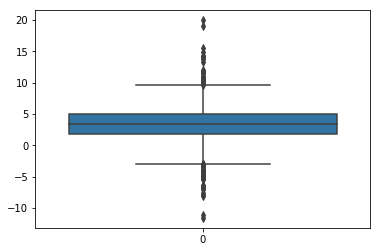

In [40]:
sns.boxplot(data=strat_df['Returns'])
plt.show()

In [41]:
outlier_detection = DBSCAN(min_samples = 2, eps = 0.2)
data = np.array(strat_df['Returns'].values).reshape(-1,1)
clusters = outlier_detection.fit_predict(data)
list(clusters).count(-1)

14

In [42]:
clf = IsolationForest( behaviour = 'new', max_samples=3000, random_state = 1, contamination= 0.01)
preds = list(clf.fit_predict(data))
preds.count(-1)


31

# Part 2: A Family of Strategies #

In [43]:
def contrarianStrat(k, raw_df, clean_df):
    dates = raw_df['Date'].unique()
    securities = raw_df['ID'].unique()
    
    signal_df_lag = pd.DataFrame(index=dates, columns = securities)
    z = [0]*(k-1)
    for ID in securities:
        lagged_signals = - (clean_df[ID]-index['Index'])
        lagged_signals = list(lagged_signals)[:-(k-1)]
        signal_df_lag[ID]= z + lagged_signals
    signal_df_lag_T = signal_df_lag.T
    
    profit_df_lag = pd.DataFrame(index = dates, columns = ['Returns'])
    for t in range(0, k):
        
        profit_df_lag['Returns'][dates[t]]=0

    for i in range(k, len(dates)):
        l=list(signal_df_lag_T.nlargest(69, dates[i-1])[dates[i-1]].index)
        s=list(signal_df_lag_T.nsmallest(69, dates[i-1])[dates[i-1]].index)
  
        profit_df_lag['Returns'][dates[i]]=(clean_df[l][i:i+1].sum(axis = 1))/69 +(clean_df[s][i:i+1].sum(axis = 1))/(-69)
    
    profit_df_lag['Returns']=profit_df_lag['Returns'].astype(float)


    return profit_df_lag


#### Takes some time to run ####

In [45]:
K = [2,3,4,5]
lag_results = pd.DataFrame(index= metrics,columns = K)
for k in K:
    ret = contrarianStrat(k,raw_df, clean_df)
    lag_results[k]['Mean of annualized returns']= np.round(np.mean(ret['Returns']), decimals=2)
    lag_results[k]['Standard deviation']=np.round(np.std(ret['Returns'])/np.sqrt(252), decimals=4)
    lag_results[k]['Sharpe ratio']=np.round(np.mean(ret['Returns'])/(np.std(ret['Returns'])/np.sqrt(252)), decimals=2)

lag_results

,2,3,4,5
Mean of annualized returns,0.37,0.22,0.16,0.09
Standard deviation,0.1344,0.1293,0.1285,0.1283
Sharpe ratio,2.74,1.73,1.27,0.66


In [47]:
lag_results[1]= [np.round(strat_mean,decimals=2), np.round(strat_std,decimals=2),np.round(strat_SR,decimals=2)] 

## Summary of results from the contrarian strategies with different values for k ##

In [48]:
lag_results

,2,3,4,5,1
Mean of annualized returns,0.37,0.22,0.16,0.09,3.33
Standard deviation,0.1344,0.1293,0.1285,0.1283,0.16
Sharpe ratio,2.74,1.73,1.27,0.66,20.36


## Creation of flat file ##

In [49]:
flat_file = pd.DataFrame(columns=['pid', 'd', 'id', 'k','w','vid'])
flat_file

,pid,d,id,k,w,vid


In [50]:
len(securities)

690

In [51]:
k_flat=[]
for l in ([1,2,3,4,5]):
    k_flat.extend([l]*690*3028)
len(k_flat)

10446600

In [52]:
d_flat = []
for day in dates:
    d_flat.extend(690*[day])

d_flat_full = 5*d_flat

In [53]:
len(d_flat_full)

10446600

In [55]:
mit_id = [929948579]*10446600
flat_file['pid']=mit_id
vid = [0]*10446600
flat_file['vid']=vid

In [57]:
flat_file['d']=d_flat_full

In [58]:
flat_file['k']=k_flat

In [59]:
690-138

552

In [83]:
w_flat = []
w_flat.extend(552*[0])
w_flat.extend(69*[np.round(1/69, decimals=3)])
w_flat.extend(69*[np.round(-1/69, decimals=3)])
w_flat_f=5*3028*w_flat

In [84]:
len(w_flat_f)

10446600

In [85]:
flat_file['w']=w_flat_f

In [56]:
invest_df_1= invest_df

In [63]:
id_flat_1 =[]
for day in dates:
    id_flat_1.extend(list(invest_df_1[day].values))
len(id_flat_1)

2089320

In [64]:
def portoflio_sec_lag(k, raw_df, clean_df):
    dates = raw_df['Date'].unique()
    securities = raw_df['ID'].unique()
    
    signal_df_lag = pd.DataFrame(index=dates, columns = securities)
    z = [0]*(k-1)
    for ID in securities:
        lagged_signals = - (clean_df[ID]-index['Index'])
        lagged_signals = list(lagged_signals)[:-(k-1)]
        signal_df_lag[ID]= z + lagged_signals
    signal_df_lag_T = signal_df_lag.T
    
    long = ['Long']*69
    short = ['Short']*69
    no_weight = ['0']*552
    index_sl=no_weight+long+short
    
    invest_df = pd.DataFrame(index= index_sl, columns = dates)
    
    #print(len(signal_df_lag_T))
    #for day in dates[(k-1):]:
     #   l_id = list(signal_df_lag_T.nlargest(69, day)[day].index)
      #  print(l_id)
       # s_id = list(signal_df_lag_T.nsmallest(69, day)[day].index)
       # print(s_id)
        #j = signal_df_lag_T.drop(l_id)
       # print(j)
        #j = j.drop(s_id)[day]
        #z_id = list(j.index)
        #invest_df[day]=z_id+l_id + s_id
    
    for i in range(0, len(dates)):
        if i <(k-1):
            invest_df[dates[i]]=[0]*690
        else:
            l_id = list(signal_df_lag_T.nlargest(69, dates[i])[dates[i]].index)
            s_id = list(signal_df_lag_T.nsmallest(69, dates[i])[dates[i]].index)
        
            j = signal_df_lag_T.drop(l_id)
      
            j = j.drop(s_id)
            z_id = list(j.index)
            invest_df[dates[i]]=z_id+l_id + s_id
    
    return invest_df

#### May take some time to run but works well (~15/20min for the following 4 lines)####

In [65]:
invest_df_2 = portoflio_sec_lag(2, raw_df, clean_df)

In [66]:
invest_df_3= portoflio_sec_lag(3, raw_df, clean_df)

In [68]:
invest_df_4= portoflio_sec_lag(4, raw_df, clean_df)

In [69]:
invest_df_5= portoflio_sec_lag(5, raw_df, clean_df)

In [70]:
id_flat_2 =[]
for day in dates:
    id_flat_2.extend(list(invest_df_2[day].values))
print(len(id_flat_2))

id_flat_3 =[]
for day in dates:
    id_flat_3.extend(list(invest_df_3[day].values))
print(len(id_flat_3))


id_flat_4 =[]
for day in dates:
    id_flat_4.extend(list(invest_df_4[day].values))
print(len(id_flat_4))

id_flat_5 =[]
for day in dates:
    id_flat_5.extend(list(invest_df_5[day].values))
len(id_flat_5)

2089320
2089320
2089320


2089320

In [71]:
id_flat = id_flat_1+id_flat_2+id_flat_3+id_flat_4+id_flat_5
len(id_flat)

10446600

In [72]:
flat_file['id']=id_flat

In [87]:
flat_file

,pid,d,id,k,w,vid
0,929948579,01/02/1990,10137,1,0.000,0
1,929948579,01/02/1990,10225,1,0.000,0
2,929948579,01/02/1990,10401,1,0.000,0
3,929948579,01/02/1990,10488,1,0.000,0
4,929948579,01/02/1990,10516,1,0.000,0
...,...,...,...,...,...,...
10446595,929948579,12/31/2001,38295,5,-0.014,0
10446596,929948579,12/31/2001,26382,5,-0.014,0
10446597,929948579,12/31/2001,42550,5,-0.014,0
10446598,929948579,12/31/2001,76946,5,-0.014,0


In [88]:
flat_file.to_csv('project_b_flat_file',index=False)

# Strategy R&D #

## Let us reproduce the strategy but select only the top 5 percentile ##

In [105]:
rd_df = pd.DataFrame(index = dates, columns = ['Returns'])
rd_df['Returns']['01/02/1990']=0

for i in range(1, len(dates)):
    l=list(signal_df_T.nlargest(34, dates[i-1])[dates[i-1]].index)
    s=list(signal_df_T.nsmallest(34, dates[i-1])[dates[i-1]].index)

    
    rd_df['Returns'][dates[i]]=(clean_df[l][i:i+1].sum(axis = 1))/34 +(clean_df[s][i:i+1].sum(axis = 1))/(-34)

In [111]:
rd_df['Returns']=rd_df['Returns'].astype(float)
rd_df

,Returns
01/02/1990,0.000000
01/03/1990,5.229280
01/04/1990,3.751494
01/05/1990,0.396893
01/08/1990,9.522682
...,...
12/24/2001,10.361519
12/26/2001,1.022433
12/27/2001,4.621907
12/28/2001,9.654282


In [116]:
rd_results = pd.DataFrame(index= metrics,columns = ['Contrarian Strategy 5th percentile'])

rd_mean = np.mean(rd_df['Returns'])
rd_std = np.std(rd_df['Returns'])/np.sqrt(252)
rd_SR = rd_mean/rd_std
rd_results['Contrarian Strategy 5th percentile']['Mean of annualized returns']= rd_mean
rd_results['Contrarian Strategy 5th percentile']['Standard deviation']=rd_std
rd_results['Contrarian Strategy 5th percentile']['Sharpe ratio'] = rd_SR

In [117]:
rd_results

,Contrarian Strategy 5th percentile
Mean of annualized returns,5.41812
Standard deviation,0.250575
Sharpe ratio,21.6227


In [122]:
rd_df['Dates']=dates

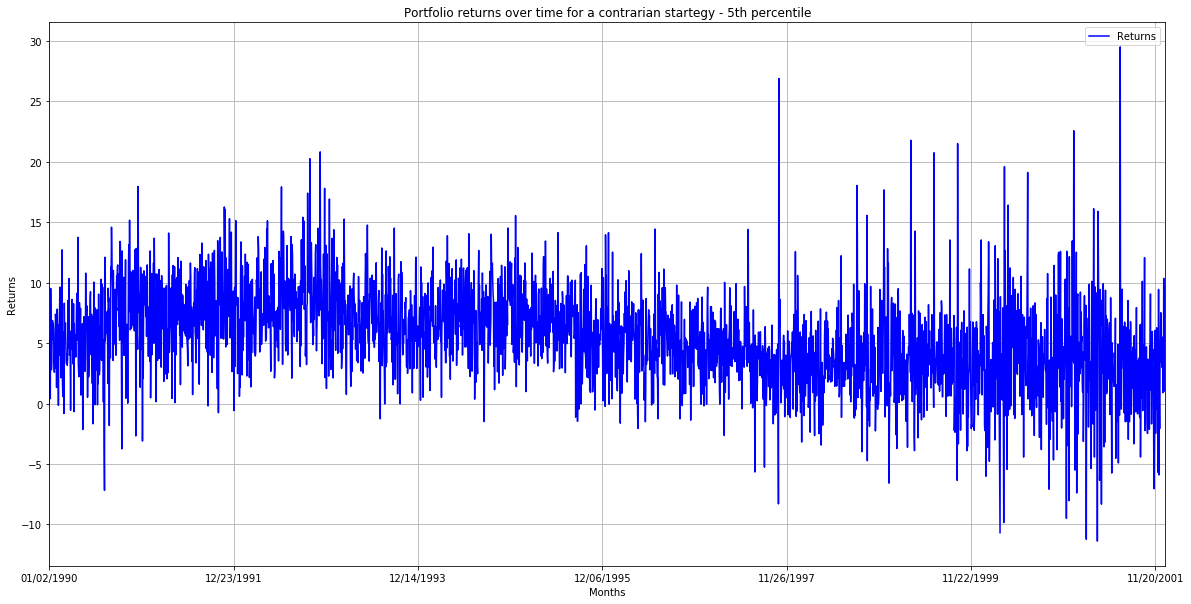

In [124]:

rd_df.plot(x = 'Dates',y = 'Returns', figsize = (20,10), grid =True, c='blue')
plt.title('Portfolio returns over time for a contrarian startegy - 5th percentile')
plt.xlabel('Months')
plt.ylabel('Returns')
plt.show()